This Machine Learning Model utilizes 5 Machine Learning Algorithms namely KNN Classification, Logistic Regression[LR], Support
Vector[SVM], Decision Tree[DT] and Random Forest[RF] to get the best possible model to predict the floods using Kerela Rainfall Data.

In [ ]:
import os

In [ ]:
# Ignoring Warnings.
import warnings  # Simple filtering
warnings.filterwarnings('ignore')


Data Insights

Importing Required Libraries:

In [11]:
import numpy as np # linear algebra used to compute the arithmetic mean or average of the array elements along with the specified axis or multiple axis.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data = pd.read_csv('kerala.csv')
print(data)

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV   

In [12]:
data.head() # returns a specified number of rows, string from the top

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [13]:
data.tail() # returns a specified number of last rows

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


Finding number of missing values

In [14]:
data.isnull().sum()  # cheaking if any colomns is left empty or not.

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

#Analyzing the Dataset:

In [15]:
print(data.shape) #store data elements in the form of an array

(118, 16)


In [16]:
data.describe() #returns description of the data in the DataFrame

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [17]:
data.cov() #used to calculate the Covariance of the Series with the other Series by excluding null/NA or missing values.

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1170.166667,-119.378632,2.176923,-13.207265,132.625641,-301.126068,-1114.149145,-1749.953846,274.983761,448.915812,-96.876496,-370.360256,-155.123504,-3063.344444
JAN,-119.378632,239.437427,4.979192,36.577053,24.039512,163.062403,545.574281,121.970900,24.434163,-214.094844,-50.812451,-14.205421,-50.968209,830.154092
FEB,2.176923,4.979192,269.166362,121.027766,90.585966,-202.129655,165.293580,21.748364,69.442838,132.629654,81.684355,-222.332684,-76.434079,455.913330
MAR,-13.207265,36.577053,121.027766,903.835779,99.315784,-456.721990,106.348567,126.186249,232.033874,527.184758,-64.980285,-81.573089,28.990108,1578.305793
APR,132.625641,24.039512,90.585966,99.315784,1992.145044,-754.490185,606.540393,153.070058,-388.591540,70.336859,473.330962,82.464276,-180.710372,2267.590185
MAY,-301.126068,163.062403,-202.129655,-456.721990,-754.490185,21770.641812,33.929279,-1571.703571,-3340.586652,2101.892304,2725.149056,1165.417193,-638.978371,20997.420795
JUN,-1114.149145,545.574281,165.293580,106.348567,606.540393,33.929279,34663.499937,4047.567071,-492.944239,-1194.576633,20.161145,247.329460,-581.699654,38170.332986
JUL,-1749.953846,121.970900,21.748364,126.186249,153.070058,-1571.703571,4047.567071,52435.946420,6436.876865,5846.347194,541.214459,-543.479371,-113.988396,67508.201520
AUG,274.983761,24.434163,69.442838,232.033874,-388.591540,-3340.586652,-492.944239,6436.876865,33116.888805,2178.762799,-3094.959423,-1706.808293,948.365073,33987.052721
SEP,448.915812,-214.094844,132.629654,527.184758,70.336859,2101.892304,-1194.576633,5846.347194,2178.762799,14859.885839,-369.500828,-280.077350,-49.210243,23610.285602


In [18]:
data.corr() #used to find the pairwise correlation of all columns in the Pandas Dataframe in Python.


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344


In [19]:
# replacing the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [20]:
#Printing the clean data
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [21]:
# Seperating the data which we are gonna use for prediction.
x=data.iloc[:,1:14]  #helps us to select a specific row or column from the data set
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [22]:
# Now seperate the flood label from the dataset.
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

#Plotting the Data

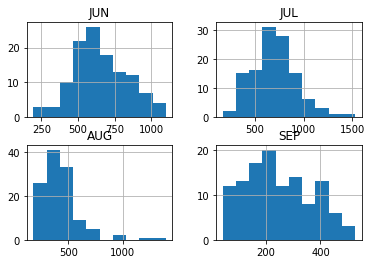

In [23]:
import matplotlib.pyplot as plt  
                                     
%matplotlib inline                    
c=data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()


Using sklearn to develop the ML Model

In [24]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1)) # Standardizes features by scaling each feature to a given range.
# This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [25]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
#The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing.
# It's usually around 80/20 or 70/30.
x_train

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
16,1917,2.9,47.6,79.4,38.1,122.9,703.7,342.7,335.1,470.3,264.1,256.4,41.6
108,2009,3.3,1.5,62.6,69.0,191.6,438.2,924.9,269.3,326.5,205.2,274.4,44.2
96,1997,2.1,1.5,36.1,60.6,133.6,544.2,970.5,536.0,292.2,288.9,298.4,88.4
69,1970,12.9,17.6,25.8,132.7,289.1,535.3,558.1,554.8,212.5,278.3,80.5,5.7
112,2013,3.9,40.1,49.9,49.3,119.3,1042.7,830.2,369.7,318.6,259.9,154.9,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,1950,0.1,53.7,31.1,68.5,242.0,638.3,905.7,387.3,411.6,250.4,149.2,8.8
27,1928,12.7,65.9,51.3,121.1,81.9,590.7,420.6,553.2,75.9,321.5,155.2,52.7
54,1955,4.2,6.3,28.2,125.9,544.2,782.4,392.8,236.0,438.5,378.2,178.1,19.8
12,1913,3.1,5.2,20.7,75.7,198.8,541.7,763.2,247.2,176.9,422.5,109.9,45.8


In [28]:
x_test

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
30,1931,3.3,0.3,19.2,126.9,131.7,541.7,653.9,1199.2,163.2,149.3,164.3,106.5
77,1978,3.3,14.7,31.4,73.9,396.8,758.1,686.7,516.8,119.4,171.0,365.6,39.0
6,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8
72,1973,0.0,0.3,12.3,131.5,119.9,617.0,583.5,487.5,61.3,260.8,84.5,53.8
22,1923,24.7,0.7,78.9,43.5,80.0,722.5,1008.7,943.0,254.3,203.1,83.9,41.6
99,2000,11.7,57.8,21.5,96.3,124.5,633.8,343.2,566.5,195.8,214.2,78.1,69.1
87,1988,0.8,17.5,38.1,177.6,157.2,511.3,502.8,379.8,451.7,68.5,67.0,31.1
103,2004,2.4,8.1,37.9,113.2,610.9,673.4,385.4,417.9,192.8,320.6,120.7,2.7
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
39,1940,0.6,1.5,3.8,126.5,217.4,606.4,877.3,610.8,68.2,257.7,287.5,60.1


In [29]:
y_train=y_train.astype('int')
y_train

16     0
108    0
96     1
69     0
112    1
      ..
49     1
27     0
54     1
12     0
24     1
Name: FLOODS, Length: 94, dtype: int64

In [30]:
y_test=y_test.astype('int')
y_test

30     1
77     1
6      1
72     0
22     1
99     0
87     0
103    0
3      1
39     1
51     0
80     1
115    0
95     0
44     0
32     1
117    1
116    0
100    0
28     1
9      0
47     1
40     1
106    1
Name: FLOODS, dtype: int64

#KNN classifier to predict

In [33]:
clf=neighbors.KNeighborsClassifier() 
#a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
y_predict=clf.predict(x_test)
y_predict

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1])

In [ ]:
print("Values for the Floods:")
print(y_test)

Values for the Floods:
29     1
56     1
58     1
31     1
62     0
27     0
86     0
57     1
85     0
2      1
66     0
9      0
79     0
107    0
47     1
28     1
90     1
63     0
104    1
59     1
72     0
6      1
68     0
50     0
Name: FLOODS, dtype: int64


In [ ]:
print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0]


In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [ ]:
knn_acc

array([0.71875   , 0.70967742, 0.83870968])

In [ ]:
knn_proba

array([[0.4, 0.6],
       [0. , 1. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8,

#How accurate is our model?

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))


Accuracy Score:83.333333
Recall Score:91.666667
ROC score:83.333333
[[ 9  3]
 [ 1 11]]


#Logistic Regression to predict

In [ ]:
x_train_std=minmax.fit_transform(x_train)#It is used to fit the values in between 0 and 1
y_train_std=minmax.transform(x_test)

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

In [ ]:
lr_acc

array([0.875     , 0.87096774, 0.87096774])

In [ ]:
lr_proba

array([[0.47511097, 0.52488903],
       [0.14637412, 0.85362588],
       [0.38427048, 0.61572952],
       [0.6211244 , 0.3788756 ],
       [0.57079463, 0.42920537],
       [0.45040557, 0.54959443],
       [0.46905378, 0.53094622],
       [0.25321535, 0.74678465],
       [0.42824343, 0.57175657],
       [0.27309724, 0.72690276],
       [0.78189703, 0.21810297],
       [0.39506705, 0.60493295],
       [0.62667554, 0.37332446],
       [0.45094163, 0.54905837],
       [0.61879902, 0.38120098],
       [0.14678787, 0.85321213],
       [0.62472147, 0.37527853],
       [0.53992052, 0.46007948],
       [0.58606872, 0.41393128],
       [0.44798146, 0.55201854],
       [0.59164537, 0.40835463],
       [0.57588177, 0.42411823],
       [0.4786587 , 0.5213413 ],
       [0.52868755, 0.47131245],
       [0.39749535, 0.60250465],
       [0.40538145, 0.59461855],
       [0.22228663, 0.77771337],
       [0.25228293, 0.74771707],
       [0.39704375, 0.60295625],
       [0.36983795, 0.63016205],
       [0.

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0])

In [ ]:
print(y_test.values)

[1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0]


In [ ]:
print("List of the Predicted Values:")
print(y_pred)

List of the Predicted Values:
[0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0]


#Accuracy and Efficiency of our Model

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:87.500000
recall score:83.333333
roc score:87.500000
[[11  1]
 [ 2 10]]


#Support Vector Classification

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [ ]:
svc_acc

array([0.84375   , 0.80645161, 0.96774194])

In [ ]:
svc_proba

array([[3.46131046e-01, 6.53868954e-01],
       [1.80628088e-05, 9.99981937e-01],
       [2.80037092e-01, 7.19962908e-01],
       [6.38967666e-01, 3.61032334e-01],
       [8.04444104e-01, 1.95555896e-01],
       [5.37736922e-01, 4.62263078e-01],
       [7.52832358e-01, 2.47167642e-01],
       [1.64638251e-02, 9.83536175e-01],
       [7.00161280e-02, 9.29983872e-01],
       [3.00821096e-02, 9.69917890e-01],
       [9.40301477e-01, 5.96985229e-02],
       [1.01227744e-01, 8.98772256e-01],
       [8.62568176e-01, 1.37431824e-01],
       [2.80519883e-01, 7.19480117e-01],
       [9.28706944e-01, 7.12930563e-02],
       [8.67765256e-03, 9.91322347e-01],
       [8.82315932e-01, 1.17684068e-01],
       [8.11250271e-01, 1.88749729e-01],
       [6.01425845e-01, 3.98574155e-01],
       [5.79111846e-01, 4.20888154e-01],
       [8.45106370e-01, 1.54893630e-01],
       [9.36759283e-01, 6.32407169e-02],
       [3.35669062e-01, 6.64330938e-01],
       [5.77087864e-01, 4.22912136e-01],
       [7.848959

In [ ]:
svc_scores=svc_proba[:,1]
svc_scores


array([0.65386895, 0.99998194, 0.71996291, 0.36103233, 0.1955559 ,
       0.46226308, 0.24716764, 0.98353617, 0.92998387, 0.96991789,
       0.05969852, 0.89877226, 0.13743182, 0.71948012, 0.07129306,
       0.99132235, 0.11768407, 0.18874973, 0.39857415, 0.42088815,
       0.15489363, 0.06324072, 0.66433094, 0.42291214, 0.92151041,
       0.69500849, 0.94256507, 0.87795702, 0.72547839, 0.81712203,
       0.51855812, 0.87080859, 0.5       , 0.24393765, 0.72148575,
       0.00978137, 0.77841078, 0.01929044, 0.00518236, 0.25070443,
       0.01414957, 0.05945114, 0.01055842, 0.58716591, 0.30793942,
       0.94512939, 0.00570627, 0.90065506, 0.36195489, 0.99097278,
       0.16652394, 0.98173904, 0.02741928, 0.1827807 , 0.18657477,
       0.4387489 , 0.47914888, 0.21219693, 0.99048899, 0.02440607,
       0.98866185, 0.10828006, 0.2789196 , 0.13232401, 0.94028497,
       0.01227404, 0.54461939, 0.17521083, 0.96126124, 0.8402239 ,
       0.01661194, 0.52160716, 0.94189215, 0.79042477, 0.5    

In [ ]:
y_pred=svc_classifier.predict(x_test)
print("Flood Values:")
print(y_test.values)

Flood Values:
[1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0]


In [ ]:
print(y_pred)

[0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0]


#Accuracy of our model

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:91.666667
recall score:91.666667
roc score:91.666667
[[11  1]
 [ 1 11]]


#Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.5625    , 0.80645161, 0.74193548])

In [ ]:
y_pred=dtc_clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1])

In [ ]:
print("Actual Values:")
print(y_test.values)

Actual Values:
[1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0]


#Printing the Accuracy

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:70.833333
recall score:66.666667
roc score:70.833333
[[9 3]
 [4 8]]


#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [ ]:

rmf_clf_acc

array([0.78125   , 0.87096774, 0.83870968])

In [ ]:
rmf_proba

array([[0.46598247, 0.53401753],
       [0.17191891, 0.82808109],
       [0.37891084, 0.62108916],
       [0.63167457, 0.36832543],
       [0.56735348, 0.43264652],
       [0.35131651, 0.64868349],
       [0.50328933, 0.49671067],
       [0.25656805, 0.74343195],
       [0.50125824, 0.49874176],
       [0.30952741, 0.69047259],
       [0.79619078, 0.20380922],
       [0.43568018, 0.56431982],
       [0.50768098, 0.49231902],
       [0.38505382, 0.61494618],
       [0.66197492, 0.33802508],
       [0.19764069, 0.80235931],
       [0.64947647, 0.35052353],
       [0.40607281, 0.59392719],
       [0.51626203, 0.48373797],
       [0.41959573, 0.58040427],
       [0.67793855, 0.32206145],
       [0.4739041 , 0.5260959 ],
       [0.36012498, 0.63987502],
       [0.51101843, 0.48898157],
       [0.44736656, 0.55263344],
       [0.31371627, 0.68628373],
       [0.23515476, 0.76484524],
       [0.53548619, 0.46451381],
       [0.44348928, 0.55651072],
       [0.24828891, 0.75171109],
       [0.

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:70.833333
recall score:66.666667
roc score:70.833333
[[9 3]
 [4 8]]


#Final Accuracy of our Models

In [ ]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.833333
1   LR  0.875000
2  SVC  0.916667
3   DT  0.708333
4   RF  0.791667


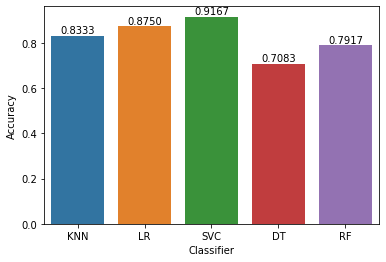

In [ ]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()